In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
author_data=pd.read_csv("author_data_clusters.csv")
author_data.index=author_data.id
author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
author_data.sample(20)

,gender,age,topic,sign,grupo_edad,Freq
id,,,,,,
3931664,female,16,indUnk,Aries,A,56
2603804,male,17,indUnk,Libra,A,23
3445546,female,24,Student,Sagittarius,B,22
3626815,male,17,Student,Cancer,A,5
2033616,female,17,Student,Virgo,A,150
2597433,female,15,indUnk,Pisces,A,74
3519891,female,17,indUnk,Leo,A,24
3715542,male,27,Telecommunications,Leo,B,4
3438528,male,15,indUnk,Virgo,A,11


In [3]:
tfidf_data=pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")#_2# This dataframe is already normalized to max val
# tfidf_data.index=author_data.id
# # author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
tfidf_data.sample(20)

,00,000,10,100,11,12,13,14,15,16,...,ya,yay,yea,yeah,year,years,yes,yesterday,york,young
id,,,,,,,,,,,,,,,,,,,,,
3558487,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.002152,0.000000,0.000000,0.0
2873751,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.003858,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.0
3975659,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3690074,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3639232,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3867686,0.0,0.0,0.000000,0.0,0.00269,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.004501,0.000000,0.000000,0.002272,0.002297,0.003266,0.0
3928549,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.006653,0.000000,0.000000,0.0
3506080,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3299025,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000,0.000000,0.0,...,0.00000,0.000000,0.0,0.000000,0.007411,0.001905,0.000000,0.000000,0.000000,0.0


In [4]:
author_data=author_data.loc[tfidf_data.index,:]# select sample tfidf matrix /// Cuando la matriz viene de una muestra

In [5]:
author_data.Freq=author_data.Freq/author_data.Freq.max() # Normalizar frecuencia de publicaciones

In [6]:
# enco_cath=pd.get_dummies(author_data[["gender","grupo_edad"]]).astype("float64")

In [7]:
# enco_cath=enco_cath.loc[:,["gender_female","grupo_edad_A","grupo_edad_B","grupo_edad_C"]]

In [8]:
# author_data_norm=enco_cath.join(author_data.Freq)
# author_data_norm=author_data_norm.join(tfidf_data)

In [9]:
# author_data_norm

# Clustering

In [10]:
# auth_ward_full=hierarchy.linkage(encoded_authors, 'ward')

In [11]:
# plt.figure(figsize=(15,35))
# dn_tf_full = hierarchy.dendrogram(auth_ward_full,orientation="left")
# plt.title('Ward Link Dendrogram')
# plt.show()

In [12]:
# 3d Embedding for visualization
spect_emb_3=manifold.SpectralEmbedding(n_components=3, n_jobs=-1).fit_transform(tfidf_data)#author_data_norm)#

In [13]:
auth_ward_3=hierarchy.linkage(spect_emb_3, 'ward')

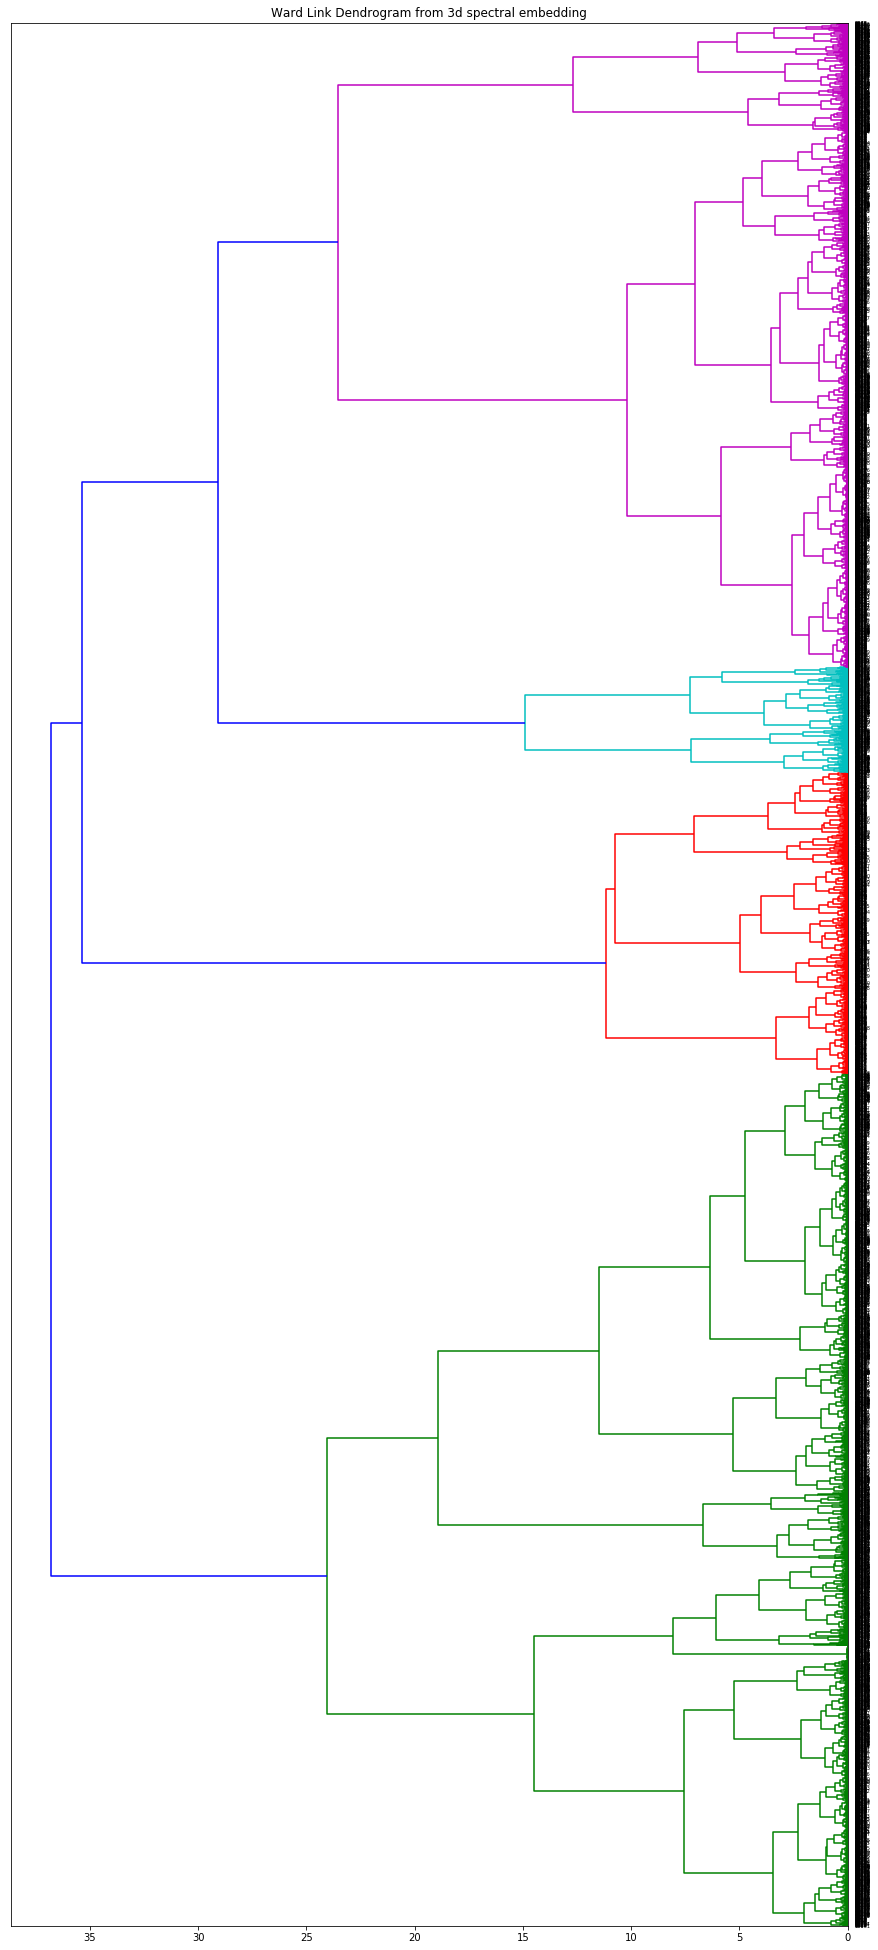

In [14]:
plt.figure(figsize=(15,35))
dn_tf_3=hierarchy.dendrogram(auth_ward_3,orientation="left")
plt.title('Ward Link Dendrogram from 3d spectral embedding')
plt.show()

In [15]:
clustering_3d_ward = AgglomerativeClustering(linkage='ward', n_clusters=6)
clustering_3d_ward.fit(spect_emb_3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func=<function mean at 0x000002102DDCBA60>)

In [16]:
pd.crosstab(index=clustering_3d_ward.labels_, columns="count")

col_0,count
row_0,
0,3100
1,670
2,1921
3,688
4,2342
5,3420


In [17]:
# spect_emb_3=spect_emb_3*1000

Text(0.5,1,'2d spectral coordinates from 3d spectral hierarchical (ward) clustering')

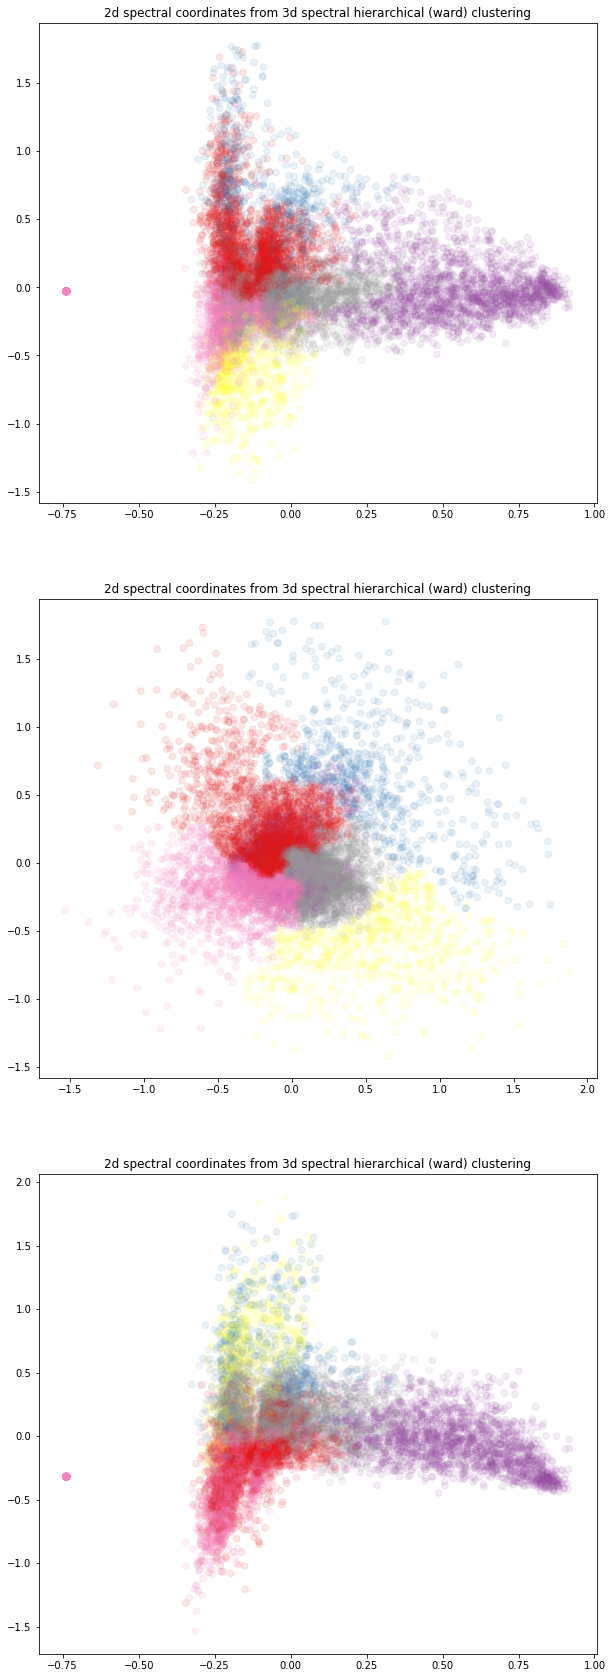

In [18]:
plt.figure(figsize=(10,30))
par_alf=0.1
plt.subplot(311)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(312)
plt.scatter(spect_emb_3[:,2],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(313)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,2], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

Making animation
Saving Movie File


MovieWriter imagemagick unavailable.


Saving animated GIF File


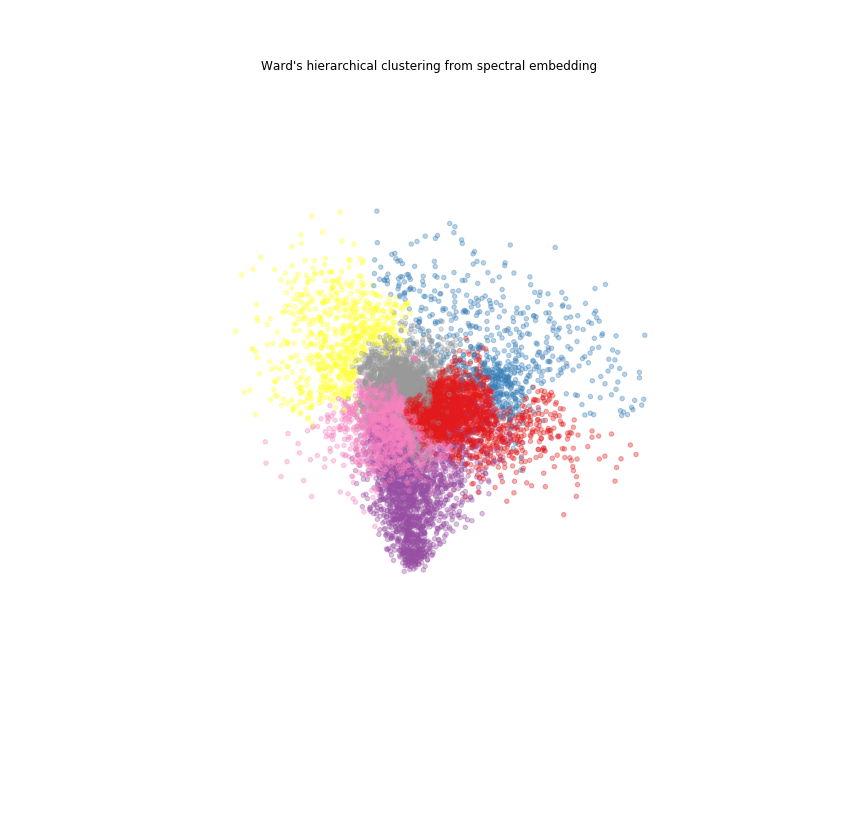

In [19]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=clustering_3d_ward.labels_, 
           alpha=0.35,
           cmap=plt.cm.Set1)
plt.title("Ward's hierarchical clustering from spectral embedding" )
plt.axis('off') # remove axes for visual appeal

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
print("Saving Movie File")
rot_animation.save('cluster_anim_2.mp4', writer=writer)
print("Saving animated GIF File")
rot_animation.save('whljgr_clustering_2.gif', dpi=80, writer='imagemagick')

In [20]:
author_data["cluster"]=clustering_3d_ward.labels_
author_data["embd_x_coord"]=spect_emb_3[:,0]
author_data["embd_y_coord"]=spect_emb_3[:,1]
author_data["embd_z_coord"]=spect_emb_3[:,2]

In [21]:
author_data.head(30)

,gender,age,topic,sign,grupo_edad,Freq,cluster,embd_x_coord,embd_y_coord,embd_z_coord
id,,,,,,,,,,
665500,male,35,indUnk,Aries,C,0.189345,2,0.820946,0.036276,-0.384345
1690553,male,17,Student,Scorpio,A,0.042477,2,0.271200,-0.108108,-0.170754
2191528,female,14,Arts,Cancer,A,0.015839,2,0.318842,0.519239,-0.163354
993945,female,25,HumanResources,Leo,B,0.054716,2,0.816085,-0.164705,-0.334432
3931639,female,33,indUnk,Aries,C,0.032397,2,0.451838,0.010587,-0.132722
3607330,male,39,indUnk,Leo,C,0.009839,4,-0.020561,-0.332737,-0.016218
3749504,female,17,Student,Pisces,A,0.010799,5,-0.035214,-0.163511,0.244574
1769576,male,26,Arts,Aquarius,B,0.045836,2,0.808073,-0.172290,-0.302282
2059313,male,26,Student,Leo,B,0.095992,2,0.772163,-0.113837,-0.215592


In [22]:
author_data.to_csv("author_data_clusters_2.csv")

# Explore Clusters

In [23]:
pd.crosstab(index=author_data.topic, columns=author_data.cluster)

cluster,0,1,2,3,4,5
topic,,,,,,
Accounting,15,4,15,3,12,18
Advertising,12,2,12,6,18,31
Agriculture,10,2,5,0,1,7
Architecture,12,0,0,5,14,15
Arts,88,14,100,30,92,142
Automotive,6,2,2,2,8,7
Banking,15,0,15,2,27,15
Biotech,6,1,7,1,9,7
BusinessServices,21,4,17,3,23,24


In [24]:
pd.crosstab(index=author_data.grupo_edad, columns=author_data.cluster)

cluster,0,1,2,3,4,5
grupo_edad,,,,,,
A,1829,586,643,208,552,1279
B,969,77,991,331,1213,1643
C,302,7,287,149,577,498


In [25]:
pd.crosstab(index=[author_data.topic,author_data.grupo_edad], columns=author_data.cluster)

cluster                          0    1    2    3    4    5
topic              grupo_edad                              
Accounting         A             1    1    2    0    0    3
                   B            14    3   10    1    8   12
                   C             0    0    3    2    4    3
Advertising        A             0    1    0    0    1    0
                   B            10    1    9    5   12   25
                   C             2    0    3    1    5    6
Agriculture        A             6    2    0    0    0    4
                   B             2    0    5    0    1    2
                   C             2    0    0    0    0    1
Architecture       A             3    0    0    0    1    2
                   B             7    0    0    3   11   10
                   C             2    0    0    2    2    3
Arts               A            38   11   22    5    9   40
                   B            35    3   60   19   48   76
                   C            15    0   18    6   35   26
Automotive         A             1    1    0    1    2    3
                   B             4    1    1    0    5    1
                   C             1    0    1    1    1    3
Banking            A             1    0    0    0    0    0
                   B            11    0   14    1   20   13
                   C             3    0    1    1    7    2
Biotech            A             2    1    4    0    1    3
                   B             4    0    1    1    5    4
                   C             0    0    2    0    3    0
BusinessServices   A             6    2    0    2    2    1
                   B            11    2   15    1   14   17
                   C             4    0    2    0    7    6
Chemicals          A             8    0    5    0    3    2
                   B             5    2    4    0    1    5
                   C             0    0    0    0    0    2
...                            ...  ...  ...  ...  ...  ...
RealEstate         A             3    0    2    0    0    0
                   B             3    1    4    0    2    5
                   C             1    0    1    1    2    3
Religion           A             3    1    3    2    1    5
                   B             9    1    7    8    4   18
                   C             6    0    5    1    5    7
Science            A             8    0    2    2    2    3
                   B            15    0   22    2   20   22
                   C             4    0    0    1    3    5
Sports-Recreation  A            15    5    3    3    0    3
                   B             4    1    5    1    8    6
                   C             2    0    1    0    0    1
Student            A           942  265  332  107  288  664
                   B           115   12  109   35  129  183
                   C             6    0    4    2   14    4
Technology         A            18    0    4    1   13    9
                   B            84    3   48   21  136  104
                   C            35    1   22   16   76   31
Telecommunications A             0    1    1    0    0    1
                   B             5    0   12    4   12   15
                   C             4    0    3    2    8    2
Tourism            A             2    0    2    0    0    5
                   B             9    3    4    4    9    9
                   C             2    0    2    0    2    3
Transportation     A             1    1    1    0    2    2
                   B             6    1    2    3    8   11
                   C             2    0    5    0   10   10
indUnk             A           614  247  204   76  174  418
                   B           333   29  362  122  363  602
                   C           111    6  122   60  185  204

[120 rows x 6 columns]

In [26]:
centroides_median=np.array([[np.median(author_data.loc[author_data.cluster==clst,"embd_x_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_y_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_z_coord"])]
 for clst in list(set(author_data.cluster))])

In [27]:
enumerate(list(set(author_data.cluster)))

Text(0.5,0.92,"Ward's hierarchical clustering from spectral embedding")

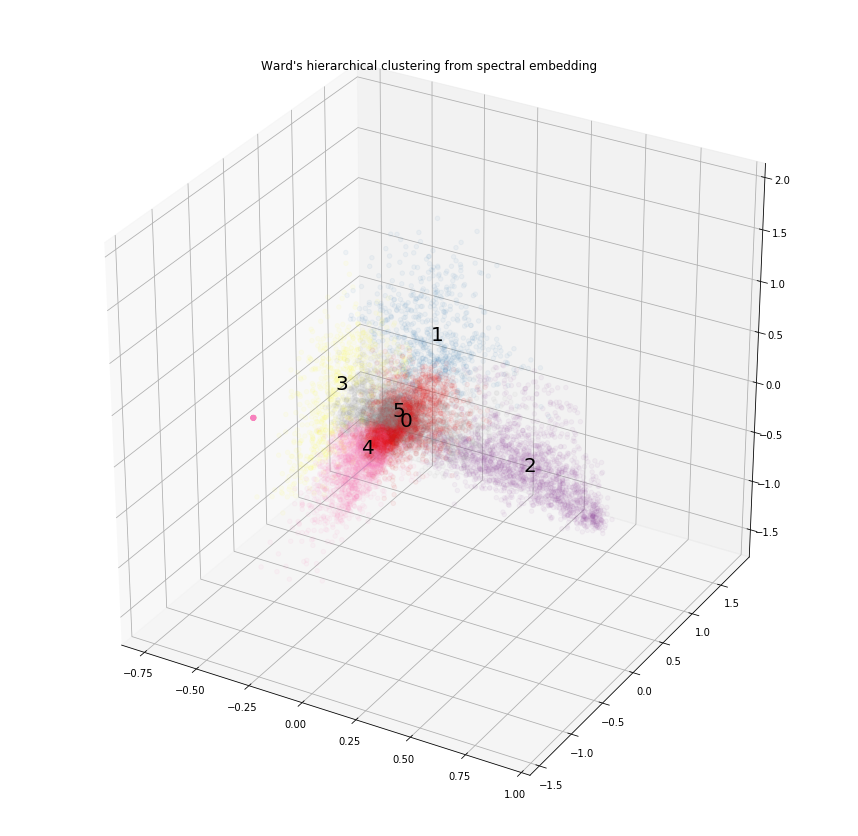

In [28]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=clustering_3d_ward.labels_, 
           alpha=0.05,
           cmap=plt.cm.Set1)

# ax.scatter(xs=centroides_median[:,0],
#            ys=centroides_median[:,1],
#            zs=centroides_median[:,2], 
#            s=500)

for i, txt in enumerate(list(set(author_data.cluster))):
    ax.text(centroides_median[i,0],
            centroides_median[i,1],
            centroides_median[i,2],
            '%s' % (str(txt)), size=20, zorder=1, color='k')

plt.title("Ward's hierarchical clustering from spectral embedding" )